In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt


In [8]:
Spam_File=open('01_SMSSpamCollection','r')

In [9]:
# lets examine the first line of the text file to get a sense of how its strucutred
text=Spam_File.readline()
print(text.strip())

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


We need to preprocess this text data into a dataframe.

1. We need to read line by line and store text in dictionary
2. Convert dicitonary to dataframe
3. Derive features from the spam and ham messages

In [10]:
def text_to_dataframe(File_Name):
    messages_and_results=[]

    # The following code create a list of dictionaries in the following form {message, whther message is spam or not}
    with open(File_Name,'r') as Spam_File:
        lines=Spam_File.readlines()
        for text in lines:
            if text.startswith("ham"):
                result="ham"
                text=text.replace(result,'',1) # remove the key from the text
                message=text.strip() # non-spam text accompanying the key
                messages_and_results.append({'Text':message,'Result': result})
            elif text.startswith("spam"):
                result="spam"
                text=text.replace(result,'',1) # remove the key from the text
                message=text.strip() # non-spam text accompanying the key
                messages_and_results.append({'Text':message,'Result': result})
        
    df=pd.DataFrame(messages_and_results)
            
    return df
         
  
       

In [11]:
Spam_df = text_to_dataframe('01_SMSSpamCollection')

In [12]:
Spam_df.head()

,Text,Result
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [13]:
# sanity check
Spam_df['Result'].value_counts()

Result
ham     4827
spam     747
Name: count, dtype: int64

<h2> EDA </h2>

<h4> Class Imbalance</h4>

In [14]:
count=Spam_df['Result'].value_counts()
num_of_Messages=Spam_df.shape[0]

In [15]:
Spam_prop = (count['spam']/num_of_Messages)*100 # percentage of messags that are spam in the dataset
Non_Spam_prop = (count['ham']/num_of_Messages)*100  # percentage of messags that are not spam in the dataset

In [16]:
print(f" Spam messages is {Spam_prop:.2f}% of the data")
print(f" Non-spam messages is {Non_Spam_prop:.2f}% of the data")

 Spam messages is 13.40% of the data
 Non-spam messages is 86.60% of the data


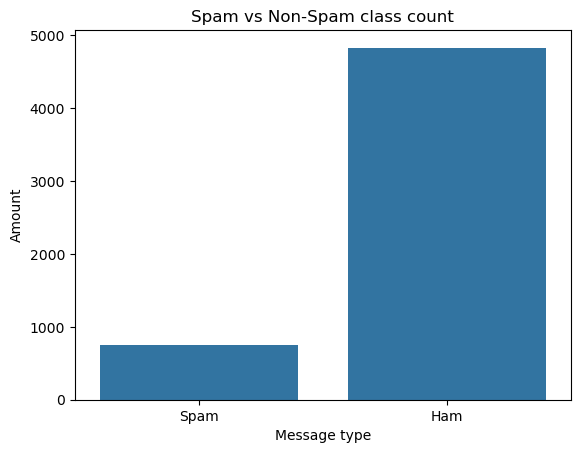

In [17]:
# Visualization of this imbalance 
categories=['Spam','Ham']
Amount=[count['spam'],count['ham']]
sns.barplot(x=categories,y=Amount)

plt.xlabel('Message type')
plt.ylabel('Amount')
plt.title("Spam vs Non-Spam class count")
plt.show()

Based on the graph, we can see that the distribution of spam messages is significantly lower in comparsion to that of non-spam messages

<h2> Spam and Ham Text Characteristics</h2>

<h4> Message Length Analysis (character length) </h4>

In [18]:
Spam_df.head(2)

,Text,Result
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham


In [19]:
Spam_df['num_chars'] = Spam_df['Text'].apply(len)

In [20]:
Spam_df.head()

,Text,Result,num_chars
0,"Go until jurong point, crazy.. Available only ...",ham,111
1,Ok lar... Joking wif u oni...,ham,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155
3,U dun say so early hor... U c already then say...,ham,49
4,"Nah I don't think he goes to usf, he lives aro...",ham,61


In [21]:
Spam_bool_marker = Spam_df['Result'] == 'spam'
Non_Spam_bool_marker = Spam_df['Result'] == 'ham'

Spam_Messages = Spam_df[Spam_bool_marker]
Ham_Messages = Spam_df[Non_Spam_bool_marker]


In [22]:
Num_Spam = len(Spam_Messages)
Ave_Spam_Mes_Len = Spam_Messages['num_chars'].sum() / Num_Spam

Num_Ham_Spam = len(Ham_Messages)
Ave_Ham_Mes_Len = Ham_Messages['num_chars'].sum() / Num_Ham_Spam

In [23]:
Char_Percentage_Diff = round((( Ave_Spam_Mes_Len - Ave_Ham_Mes_Len)/Ave_Ham_Mes_Len) *100)
print(f" There are about {Char_Percentage_Diff}%  more characters in spam messages compared to ham messages on average")

 There are about 94%  more characters in spam messages compared to ham messages on average


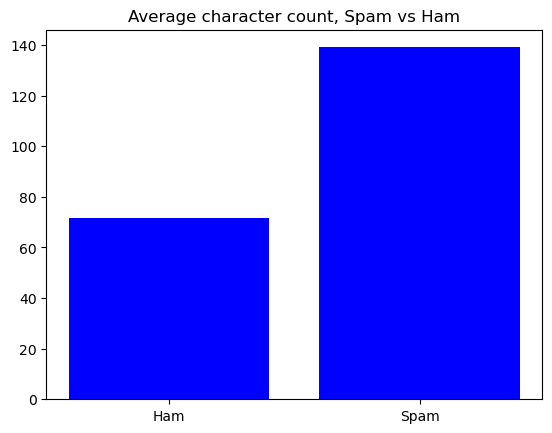

In [24]:
x = ["Ham","Spam"]
y = [Ave_Ham_Mes_Len,Ave_Spam_Mes_Len]
plt.bar(x,y , color="Blue")
plt.title("Average character count, Spam vs Ham")
plt.show()

Based on the chart, spam messages are cosniderably longer in comparison to ham messages. This might be due to a higher concetration of unwanted characters/words in the text.  

With that in mind, lets further explore the text characteristics in depth.

<h4> Average word count, Spam vs Ham</h4>

In [25]:
def Word_Count(message):
    return len(re.findall(r"\b[a-zA-Z']+\b" , message))

Spam_df['num_words'] = Spam_df['Text'].apply(Word_Count)

In [26]:
Spam_df.head()

,Text,Result,num_chars,num_words
0,"Go until jurong point, crazy.. Available only ...",ham,111,20
1,Ok lar... Joking wif u oni...,ham,29,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155,27
3,U dun say so early hor... U c already then say...,ham,49,11
4,"Nah I don't think he goes to usf, he lives aro...",ham,61,13


In [27]:
Spam_bool_marker = Spam_df['Result'] == 'spam'
Non_Spam_bool_marker = Spam_df['Result'] == 'ham'

Spam_Messages = Spam_df[Spam_bool_marker]
Ham_Messages = Spam_df[Non_Spam_bool_marker]

In [28]:
Num_Spam = len(Spam_Messages)
Ave_Spam_Word_Count = Spam_Messages['num_words'].sum() / Num_Spam

Num_Ham_Spam = len(Ham_Messages)
Ave_Ham_Word_Count = Ham_Messages['num_words'].sum() / Num_Ham_Spam

In [29]:
Word_Percentage_Diff = round((( Ave_Spam_Word_Count - Ave_Ham_Word_Count)/Ave_Ham_Word_Count) *100)
print(f" There are about {Word_Percentage_Diff}%  more words in spam messages compared to ham messages on average")

 There are about 49%  more words in spam messages compared to ham messages on average


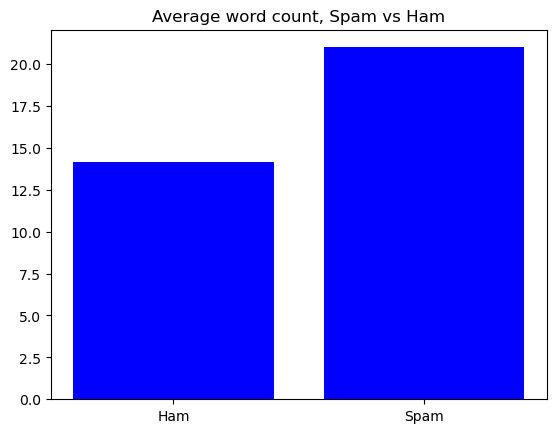

In [30]:
x = ["Ham","Spam"]
y = [Ave_Ham_Word_Count, Ave_Spam_Word_Count]
plt.bar(x,y , color="Blue")
plt.title("Average word count, Spam vs Ham")
plt.show()

<h4> Lets check the number of special characters</h4>

In [31]:
def spec_char_check(message):
    return len(re.findall(r'[^a-zA-Z0-9\s]', message))

Spam_df['num_spec_chars'] = Spam_df['Text'].apply(spec_char_check)

In [32]:
Spam_df.head()

,Text,Result,num_chars,num_words,num_spec_chars
0,"Go until jurong point, crazy.. Available only ...",ham,111,20,9
1,Ok lar... Joking wif u oni...,ham,29,6,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155,27,6
3,U dun say so early hor... U c already then say...,ham,49,11,6
4,"Nah I don't think he goes to usf, he lives aro...",ham,61,13,2


In [33]:
Spam_bool_marker = Spam_df['Result'] == 'spam'
Non_Spam_bool_marker = Spam_df['Result'] == 'ham'

Spam_Messages = Spam_df[Spam_bool_marker]
Ham_Messages = Spam_df[Non_Spam_bool_marker]


In [34]:
Num_Spam = len(Spam_Messages)
Ave_Spam_Mes_Spec_Chars = Spam_Messages['num_spec_chars'].sum() / Num_Spam

Num_Ham_Spam = len(Ham_Messages)
Ave_Ham_Mes_Spec_Chars = Ham_Messages['num_spec_chars'].sum() / Num_Ham_Spam

In [35]:
Spec_Percentage_Diff = round((( Ave_Spam_Mes_Spec_Chars - Ave_Ham_Mes_Spec_Chars)/Ave_Ham_Mes_Spec_Chars) *100)
print(f" There are about {Spec_Percentage_Diff}%  more special characters in spam messages compared to ham messages on average")

 There are about 61%  more special characters in spam messages compared to ham messages on average


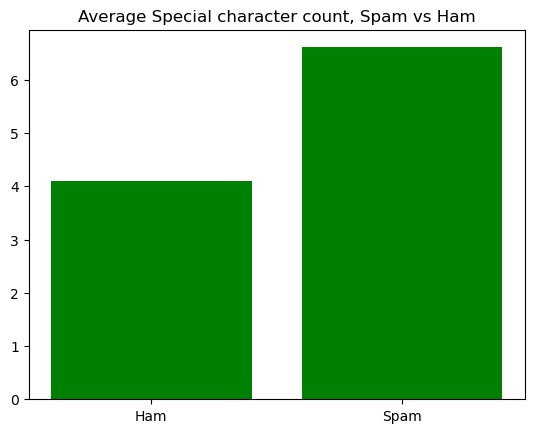

In [36]:
x = ["Ham","Spam"]
y = [Ave_Ham_Mes_Spec_Chars,Ave_Spam_Mes_Spec_Chars]
plt.bar(x,y , color="Green")
plt.title("Average Special character count, Spam vs Ham")
plt.show()

Considering the nature of spam messages, it makes since for there to be less special characters in the ham messages than spam messages.

<h4> Lets check the number of digits</h4>

In [37]:
def digit_check(message):
    return len(re.findall(r'\d', message))

Spam_df['num_digits'] = Spam_df['Text'].apply(digit_check)

In [38]:
Spam_df.head(10)

,Text,Result,num_chars,num_words,num_spec_chars,num_digits
0,"Go until jurong point, crazy.. Available only ...",ham,111,20,9,0
1,Ok lar... Joking wif u oni...,ham,29,6,6,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155,27,6,25
3,U dun say so early hor... U c already then say...,ham,49,11,6,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,61,13,2,0
5,FreeMsg Hey there darling it's been 3 week's n...,spam,148,30,10,4
6,Even my brother is not like to speak with me. ...,ham,77,16,2,0
7,As per your request 'Melle Melle (Oru Minnamin...,ham,160,25,6,1
8,WINNER!! As a valued network customer you have...,spam,158,22,8,19
9,Had your mobile 11 months or more? U R entitle...,spam,154,27,2,13


In [39]:
Spam_bool_marker = Spam_df['Result'] == 'spam'
Non_Spam_bool_marker = Spam_df['Result'] == 'ham'

Spam_Messages = Spam_df[Spam_bool_marker]
Ham_Messages = Spam_df[Non_Spam_bool_marker]


In [40]:
Num_Spam = len(Spam_Messages)
Ave_Spam_Mes_Digits = Spam_Messages['num_digits'].sum() / Num_Spam

Num_Ham_Spam = len(Ham_Messages)
Ave_Ham_Mes_Digits = Ham_Messages['num_digits'].sum() / Num_Ham_Spam

In [41]:
Digit_Percentage_Diff = round((( Ave_Spam_Mes_Digits - Ave_Ham_Mes_Digits)/Ave_Ham_Mes_Digits) *100)
print(f" There are about {Digit_Percentage_Diff }%  more digits present in spam messages in comparison to ham messages on average")

 There are about 5082%  more digits present in spam messages in comparison to ham messages on average


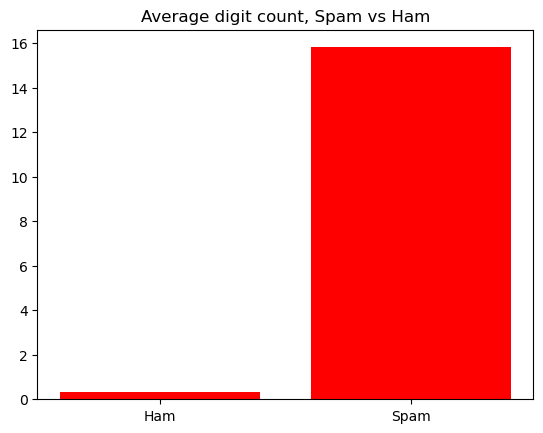

In [42]:
x = ["Ham","Spam"]
y = [Ave_Ham_Mes_Digits,Ave_Spam_Mes_Digits]
plt.bar(x,y , color="red")
plt.title("Average digit count, Spam vs Ham")
plt.show()

There is signigicantly more digits present in spam messages on average compared to ham messages.It would probably suffice to say this will probably be an important feature in determining if a message is spam or not.

<h4> Average count of Uppercase Words in each class</h4>

In [43]:
def Upper_Count(message):
    return len(re.findall(r'\b[A-Z]+\b', message)) #  [A-Z] searchs for capital letters, \b helps to establish boundaries and ensures us to we match upper case words

Spam_df['num_Uppercase_Words'] = Spam_df['Text'].apply(Upper_Count)

In [44]:
Spam_df.head()

,Text,Result,num_chars,num_words,num_spec_chars,num_digits,num_Uppercase_Words
0,"Go until jurong point, crazy.. Available only ...",ham,111,20,9,0,0
1,Ok lar... Joking wif u oni...,ham,29,6,6,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155,27,6,25,4
3,U dun say so early hor... U c already then say...,ham,49,11,6,0,2
4,"Nah I don't think he goes to usf, he lives aro...",ham,61,13,2,0,1


In [45]:
Spam_bool_marker = Spam_df['Result'] == 'spam'
Non_Spam_bool_marker = Spam_df['Result'] == 'ham'

Spam_Messages = Spam_df[Spam_bool_marker]
Ham_Messages = Spam_df[Non_Spam_bool_marker]

In [46]:
Num_Spam = len(Spam_Messages)
Ave_Spam_Upper_Words = Spam_Messages['num_Uppercase_Words'].sum() / Num_Spam

Num_Ham_Spam = len(Ham_Messages)
Ave_Ham_Upper_Words = Ham_Messages['num_Uppercase_Words'].sum() / Num_Ham_Spam

In [47]:
UpperCase_Percentage_Diff = round((( Ave_Spam_Upper_Words - Ave_Ham_Upper_Words)/Ave_Ham_Upper_Words) *100)
print(f" There are about {UpperCase_Percentage_Diff }%  more uppercase words present in spam messages in comparison to ham messages on average")

 There are about 169%  more uppercase words present in spam messages in comparison to ham messages on average


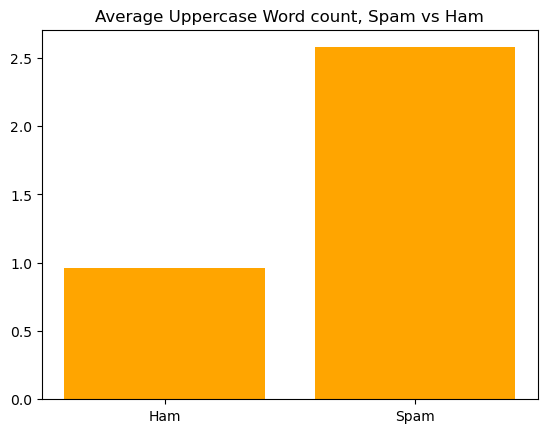

In [48]:
x = ["Ham","Spam"]
y = [Ave_Ham_Upper_Words,Ave_Spam_Upper_Words]
plt.bar(x,y , color="Orange")
plt.title("Average Uppercase Word count, Spam vs Ham")
plt.show()

The average concentration of uppercase words in spam is considerably higher than in ham messages. About 260% more to be exact.

<h4> Url/email address count, Spam vs Ham</h4>

In [49]:
def URL_Count(message):
    return len(re.findall(r'(https?://\S+|www\.\S+)', message))

def Email_Count(message):
    return len(re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', message, flags=re.IGNORECASE))

Spam_df['num_URLS'] = Spam_df['Text'].apply(URL_Count)
Spam_df['num_Emails'] = Spam_df['Text'].apply(Email_Count)

In [50]:
Spam_df.head()

,Text,Result,num_chars,num_words,num_spec_chars,num_digits,num_Uppercase_Words,num_URLS,num_Emails
0,"Go until jurong point, crazy.. Available only ...",ham,111,20,9,0,0,0,0
1,Ok lar... Joking wif u oni...,ham,29,6,6,0,0,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155,27,6,25,4,0,0
3,U dun say so early hor... U c already then say...,ham,49,11,6,0,2,0,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,61,13,2,0,1,0,0


In [51]:
Spam_bool_marker = Spam_df['Result'] == 'spam'
Non_Spam_bool_marker = Spam_df['Result'] == 'ham'

Spam_Messages = Spam_df[Spam_bool_marker]
Ham_Messages = Spam_df[Non_Spam_bool_marker]

In [52]:
# lets compare average url count first between the classes
Num_Spam = len(Spam_Messages)
Ave_Spam_URLS = Spam_Messages['num_URLS'].sum() / Num_Spam

Num_Ham_Spam = len(Ham_Messages)
Ave_Ham_URLS = Ham_Messages['num_URLS'].sum() / Num_Ham_Spam

In [53]:
URL_Percentage_Diff = round((( Ave_Spam_URLS  - Ave_Ham_URLS)/Ave_Ham_URLS) *100)
print(f" There are about {URL_Percentage_Diff } %  more URLS present in spam messages in comparison to ham messages on average")

 There are about 33502 %  more URLS present in spam messages in comparison to ham messages on average


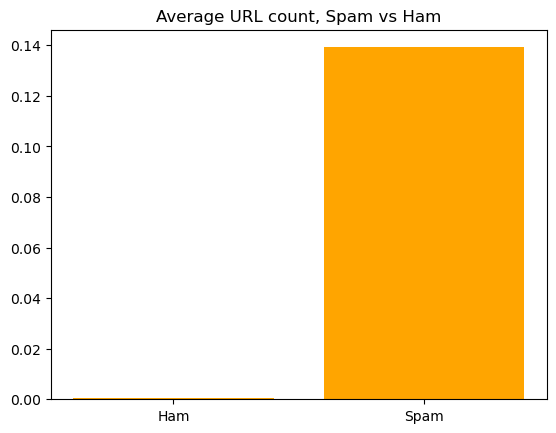

In [54]:
x = ["Ham","Spam"]
y = [Ave_Ham_URLS,Ave_Spam_URLS]
plt.bar(x,y , color="Orange")
plt.title("Average URL count, Spam vs Ham")
plt.show()

The average number of urls in both classes is considerably low, but in comparison to each other, spam is considerably higher. Based on this, I would say the presence of URLs are a strong indicator as to whether a message is spam or not.

In [55]:
# Lets compare number of email addresses
Num_Spam = len(Spam_Messages)
Ave_Spam_Emails = Spam_Messages['num_Emails'].sum() / Num_Spam

Num_Ham_Spam = len(Ham_Messages)
Ave_Ham_Emails = Ham_Messages['num_Emails'].sum() / Num_Ham_Spam


In [56]:
Emails_Percentage_Diff = round((( Ave_Spam_Emails  - Ave_Ham_Emails)/Ave_Ham_Emails) *100)
print(f" There are about {Emails_Percentage_Diff} %  more Emails present in spam messages in comparison to ham messages on average")

 There are about 3777 %  more Emails present in spam messages in comparison to ham messages on average


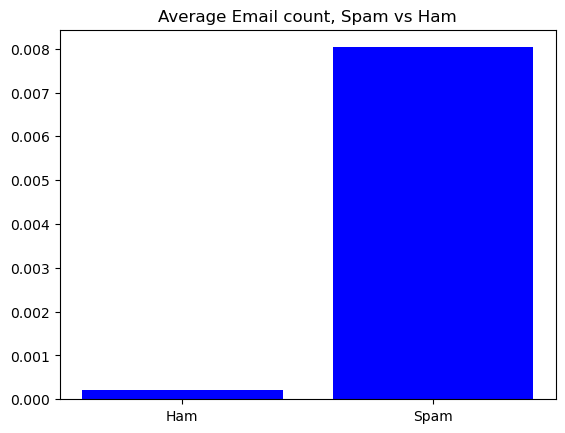

In [57]:
x = ["Ham","Spam"]
y = [Ave_Ham_Emails,Ave_Spam_Emails]
plt.bar(x,y , color="blue")
plt.title("Average Email count, Spam vs Ham")
plt.show()

Again, like url count, the average email count for both classes is very small but in comparison, spam is much higher. Based on this, email count can also serve as an important feature in distinguishing between spam and ham messages.

<h4> Suspcious word count, Spam vs Ham</h4>

Spam messages are known for contaning distinct and weird wording. The wording is usually designed to induce engagement or immediate action through by attacking people's sense of urgency. The message may promise extravagant amounts of money with the click of a button or offer explicit services through erotic medicine.  

Because of this, we will explore the number of suspicious words in the messages as they will definitely help to further distinguish the two classes.

In [58]:
# I used ChatGPT to help generate the following list of suspicious words

def Monetary_Scams(message):
    # Words related to monetery scams
    message = message.lower()
    Suspicious_Monetary_Words = [
    "free", "win", "winner", "winnings", "cash", "bonus",
    "prize", "reward", "offer", "exclusive", "guarantee",
    "100% free", "earn", "earn money", "income", "double your",
    "get paid", "giveaway", "cheap", "lowest price"
    ]

    word_count = 0

    for word in Suspicious_Monetary_Words:
        if word in message:
            word_count+=1

    return word_count


In [59]:
def Urgency_Words(message):
    # words to induce urgency and pressure

    message = message.lower()
    Suspicious_Urgency_Words = [
    "urgent", "act now", "immediately", "don't miss", "limited time",
    "important", "as seen on", "last chance", "once in a lifetime",
    "apply now", "instant access", "final notice", "only today"
    ]

    word_count = 0

    for word in Suspicious_Urgency_Words:
        if word in message:
            word_count+=1

    return word_count

In [60]:
def Security_Scams(message):
    # words related to Security, scams and risky language

    message = message.lower()
    Suspicious_Security_Words = [
    "confidential", "risk-free", "no obligation", "guaranteed",
    "safe", "access now", "click below", "click here", "this isn’t spam",
    "unsubscribe", "why pay more", "credit card", "urgent response needed",
    "act immediately", "no cost"
    ]


    word_count = 0

    for word in Suspicious_Security_Words:
        if word in message:
            word_count+=1

    return word_count

In [61]:
def Health_Scams(message):
    # words related to health scams, drug use,etc

    message = message.lower()
    Suspicious_Health_Words = [
    "viagra", "cialis", "pills", "pharmacy", "meds", "enhancement",
    "lose weight", "no prescription", "miracle", "adult", "xxx",
    "nude", "satisfaction guaranteed"
    ]

    word_count = 0

    for word in Suspicious_Health_Words:
        if word in message:
            word_count+=1

    return word_count

In [62]:
def Digital_Scams(message):
    # words related to digital scams

    message = message.lower()
    Suspicious_Digital_Words = [
    "viagra", "cialis", "pills", "pharmacy", "meds", "enhancement",
    "lose weight", "no prescription", "miracle", "adult", "xxx",
    "nude", "satisfaction guaranteed"
    ]

    word_count = 0

    for word in Suspicious_Digital_Words:
        if word in message:
            word_count+=1

    return word_count

In [63]:
def Profanities_Count(message):
    # words related to explicit language

    message = message.lower()
    curse_words = [
    "bitch", "asshole", "shit", "fuck", "bastard", "dick", "crap", 
    "slut", "whore", "damn", "piss", "motherfucker", "cunt", "fag"
    ]
    
    word_count = 0

    for word in curse_words:
        if word in message:
            word_count+=1

    return word_count

In [64]:
def Suspicious_Word_Count(message):
    Sus_Word_Count = 0
    Sus_Word_Count = Monetary_Scams(message) + Urgency_Words(message) + Security_Scams(message) + Health_Scams(message) + Digital_Scams(message) + Profanities_Count(message)
    return Sus_Word_Count

In [65]:
Spam_df['num_Sus_Words'] = Spam_df['Text'].apply(Suspicious_Word_Count)

In [66]:
Spam_df.head()

,Text,Result,num_chars,num_words,num_spec_chars,num_digits,num_Uppercase_Words,num_URLS,num_Emails,num_Sus_Words
0,"Go until jurong point, crazy.. Available only ...",ham,111,20,9,0,0,0,0,0
1,Ok lar... Joking wif u oni...,ham,29,6,6,0,0,0,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155,27,6,25,4,0,0,2
3,U dun say so early hor... U c already then say...,ham,49,11,6,0,2,0,0,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,61,13,2,0,1,0,0,0


In [67]:
Spam_bool_marker = Spam_df['Result'] == 'spam'
Non_Spam_bool_marker = Spam_df['Result'] == 'ham'

Spam_Messages = Spam_df[Spam_bool_marker]
Ham_Messages = Spam_df[Non_Spam_bool_marker]

In [68]:
Num_Spam = len(Spam_Messages)
Ave_Sus_Words_Spam = Spam_Messages['num_Sus_Words'].sum() / Num_Spam

Num_Ham_Spam = len(Ham_Messages)
Ave_Sus_Words_Ham = Ham_Messages['num_Sus_Words'].sum() / Num_Ham_Spam

In [69]:
Sus_Word_Percentage_Diff = round((( Ave_Sus_Words_Spam  - Ave_Sus_Words_Ham)/Ave_Sus_Words_Ham) *100)
print(f" There are about {Sus_Word_Percentage_Diff} %  more suspicious words present in spam messages in comparison to ham messages on average")

 There are about 1023 %  more suspicious words present in spam messages in comparison to ham messages on average


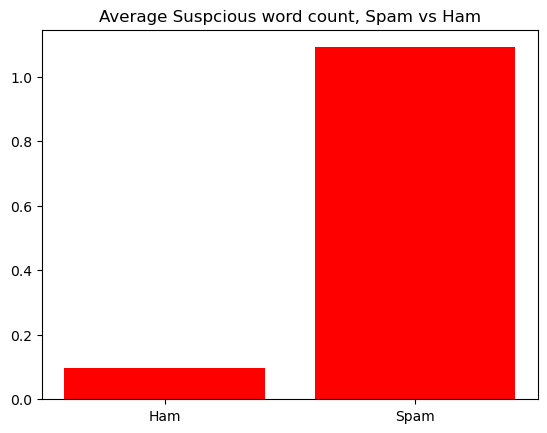

In [70]:
x = ["Ham","Spam"]
y = [Ave_Sus_Words_Ham,Ave_Sus_Words_Spam]
plt.bar(x,y , color="red")
plt.title("Average Suspcious word count, Spam vs Ham")
plt.show()

The average number of suspcious words in this case is low for both classes. However, like a lot of the features we have observed, in comparison, the suspicious wording is more pronounced in spam messages than ham messages.

Since the nature of classification is to find what distinguishes 2 or more things, this could serve to be an important feature for modeling.

In [71]:
Spam_df.head()

,Text,Result,num_chars,num_words,num_spec_chars,num_digits,num_Uppercase_Words,num_URLS,num_Emails,num_Sus_Words
0,"Go until jurong point, crazy.. Available only ...",ham,111,20,9,0,0,0,0,0
1,Ok lar... Joking wif u oni...,ham,29,6,6,0,0,0,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155,27,6,25,4,0,0,2
3,U dun say so early hor... U c already then say...,ham,49,11,6,0,2,0,0,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,61,13,2,0,1,0,0,0


<h2> Summary of findings</h2>

By examining and comparing the characteristics of spam to ham messages I have discovered quite of bit of useful information that has helped us engineer new features for our dataset. The following are the summary of my findings, along with the name of the accompanying new features:

1. There are about **94%** more ***characters*** in spam messages compared to ham messages, feature-name: **num_chars**

2. There are about **49%** more ***words*** in spam messages compared to ham messages, feature-name: **num_words**

3. There are about **61%** more ***special-characters*** in spam messages compared to ham messages, feature-name: **num_spec_chars**

4.  There are about **5082%**  more ***digits present*** in spam messages in comparison to ham messages, feature-name: **num_digits**
  
5. There are about **169%**  more ***uppercase-words*** present in spam messages in comparison to ham messages on average, feature-name: **num_Uppercase_Words**
 
6. There are about **33502%**  more ***URLS*** present in spam messages in comparison to ham messages on average, feature-name: **num_URLS**
  
7. There are about **3777%** more ***emails*** present in spam messages in comparison to ham messages on average, feature-name: **num_Emails**
  
8. There are about **1023%**  more ***suspicious-words*** present in spam messages in comparison to ham messages on average, feature-name: **num_Sus_Words**

The higher the difference the more likely this feature will be of great use in determining the class of a message. In this case the features with the highest differences are urls, digits and emails.   

***It is importnat to note that the percentage differnece is in comparison to each other, the actual average concentration can be relatively low. For instance, the average amount of URLS in spam is around 0.14 and around 0 for ham.***

<h2> Save the new dataset</h2>

In [72]:
Spam_df.to_csv('02_Spam_EDA_Phase.csv', index=False)  # index=False avoids saving the index as a column